In [1]:
from ift6758.controller.nhl_data_downloader import NHLDataDownloader

downloader = NHLDataDownloader()


ModuleNotFoundError: No module named 'nhl_data_downloader_utils'

In [2]:
downloader.download_all_seasons_play_by_play(2016,2020)

FloatProgress(value=0.0, description='Loading:', max=1.0)

x_coord is None for the event with event_owner_team_id: 22 and zone_code: . Using previous defending side.
Game ID 2016020428: Missing coordinates for event ID 657, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 25 and zone_code: . Using previous defending side.
Game ID 2016020738: Missing coordinates for event ID 663, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 16 and zone_code: . Using previous defending side.
Game ID 2016020801: Missing coordinates for event ID 812, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 5 and zone_code: . Using previous defending side.
Game ID 2016020999: Missing coordinates for event ID 466, skipping distance/angle calculation.
Failed to download data for game 2016021231.
Failed to download data for game 2016021232.
Failed to download data for game 2016021233.
Failed to download data for game 2016021234.
Failed to dow

FloatProgress(value=0.0, description='Loading:', max=1.0)

Failed to download data for game 2016030117.
Failed to download data for game 2016030127.
Failed to download data for game 2016030137.
Failed to download data for game 2016030146.
Failed to download data for game 2016030147.
Failed to download data for game 2016030155.
Failed to download data for game 2016030156.
Failed to download data for game 2016030157.
Failed to download data for game 2016030166.
Failed to download data for game 2016030167.
Failed to download data for game 2016030175.
Failed to download data for game 2016030176.
Failed to download data for game 2016030177.
Failed to download data for game 2016030187.
Failed to download data for game 2016030217.
Failed to download data for game 2016030237.
Failed to download data for game 2016030327.
Failed to download data for game 2016030417.


FloatProgress(value=0.0, description='Loading:', max=1.0)

x_coord is None for the event with event_owner_team_id: 22 and zone_code: . Using previous defending side.
Game ID 2017020273: Missing coordinates for event ID 701, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 10 and zone_code: . Using previous defending side.
Game ID 2017020387: Missing coordinates for event ID 778, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 14 and zone_code: . Using previous defending side.
Game ID 2017020533: Missing coordinates for event ID 587, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 9 and zone_code: . Using previous defending side.
Game ID 2017020533: Missing coordinates for event ID 588, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 14 and zone_code: . Using previous defending side.
Game ID 2017020533: Missing coordinates for event ID 1202, skipping distance/angle cal

FloatProgress(value=0.0, description='Loading:', max=1.0)

Failed to download data for game 2017030116.
Failed to download data for game 2017030117.
Failed to download data for game 2017030137.
Failed to download data for game 2017030147.
Failed to download data for game 2017030157.
Failed to download data for game 2017030166.
Failed to download data for game 2017030167.
Failed to download data for game 2017030175.
Failed to download data for game 2017030176.
Failed to download data for game 2017030177.
Failed to download data for game 2017030185.
Failed to download data for game 2017030186.
Failed to download data for game 2017030187.
Failed to download data for game 2017030216.
Failed to download data for game 2017030217.
Failed to download data for game 2017030227.
Failed to download data for game 2017030247.
Failed to download data for game 2017030326.
Failed to download data for game 2017030327.
Failed to download data for game 2017030416.
Failed to download data for game 2017030417.


FloatProgress(value=0.0, description='Loading:', max=1.0)

Game ID 2018020963: Missing coordinates for event ID 50, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 15 and zone_code: . Using previous defending side.
Game ID 2018020993: Missing coordinates for event ID 941, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 23 and zone_code: D. Using previous defending side.
Game ID 2018021114: Missing coordinates for event ID 87, skipping distance/angle calculation.
x_coord is None for the event with event_owner_team_id: 15 and zone_code: O. Using previous defending side.
Game ID 2018021122: Missing coordinates for event ID 14, skipping distance/angle calculation.
Failed to download data for game 2018021272.
Failed to download data for game 2018021273.
Failed to download data for game 2018021274.
Failed to download data for game 2018021275.
Failed to download data for game 2018021276.
Failed to download data for game 2018021277.
Failed to download data for ga

FloatProgress(value=0.0, description='Loading:', max=1.0)

Failed to download data for game 2018030115.
Failed to download data for game 2018030116.
Failed to download data for game 2018030117.
Failed to download data for game 2018030145.
Failed to download data for game 2018030146.
Failed to download data for game 2018030147.
Failed to download data for game 2018030157.
Failed to download data for game 2018030167.
Failed to download data for game 2018030176.
Failed to download data for game 2018030177.
Failed to download data for game 2018030217.
Failed to download data for game 2018030225.
Failed to download data for game 2018030226.
Failed to download data for game 2018030227.
Failed to download data for game 2018030315.
Failed to download data for game 2018030316.
Failed to download data for game 2018030317.
Failed to download data for game 2018030327.


FloatProgress(value=0.0, description='Loading:', max=1.0)

Game ID 2019020349: Missing coordinates for event ID 774, skipping distance/angle calculation.
Failed to download data for game 2019021083.
Failed to download data for game 2019021084.
Failed to download data for game 2019021085.
Failed to download data for game 2019021086.
Failed to download data for game 2019021087.
Failed to download data for game 2019021088.
Failed to download data for game 2019021089.
Failed to download data for game 2019021090.
Failed to download data for game 2019021091.
Failed to download data for game 2019021092.
Failed to download data for game 2019021093.
Failed to download data for game 2019021094.
Failed to download data for game 2019021095.
Failed to download data for game 2019021096.
Failed to download data for game 2019021097.
Failed to download data for game 2019021098.
Failed to download data for game 2019021099.
Failed to download data for game 2019021100.
Failed to download data for game 2019021101.
Failed to download data for game 2019021102.
Faile

FloatProgress(value=0.0, description='Loading:', max=1.0)

Failed to download data for game 2019030117.
Failed to download data for game 2019030126.
Failed to download data for game 2019030127.
Failed to download data for game 2019030136.
Failed to download data for game 2019030137.
Failed to download data for game 2019030146.
Failed to download data for game 2019030147.
Failed to download data for game 2019030156.
Failed to download data for game 2019030157.
Failed to download data for game 2019030166.
Failed to download data for game 2019030167.
Failed to download data for game 2019030177.
Failed to download data for game 2019030187.
Failed to download data for game 2019030226.
Failed to download data for game 2019030227.
Failed to download data for game 2019030317.
Failed to download data for game 2019030326.
Failed to download data for game 2019030327.
Failed to download data for game 2019030417.


FloatProgress(value=0.0, description='Loading:', max=1.0)

Failed to download data for game 2020020869.
Failed to download data for game 2020020870.
Failed to download data for game 2020020871.
Failed to download data for game 2020020872.
Failed to download data for game 2020020873.
Failed to download data for game 2020020874.
Failed to download data for game 2020020875.
Failed to download data for game 2020020876.
Failed to download data for game 2020020877.
Failed to download data for game 2020020878.
Failed to download data for game 2020020879.
Failed to download data for game 2020020880.
Failed to download data for game 2020020881.
Failed to download data for game 2020020882.
Failed to download data for game 2020020883.
Failed to download data for game 2020020884.
Failed to download data for game 2020020885.
Failed to download data for game 2020020886.
Failed to download data for game 2020020887.
Failed to download data for game 2020020888.
Failed to download data for game 2020020889.
Failed to download data for game 2020020890.
Failed to 

FloatProgress(value=0.0, description='Loading:', max=1.0)

Failed to download data for game 2020030117.
Failed to download data for game 2020030126.
Failed to download data for game 2020030127.
Failed to download data for game 2020030137.
Failed to download data for game 2020030147.
Failed to download data for game 2020030155.
Failed to download data for game 2020030156.
Failed to download data for game 2020030157.
Failed to download data for game 2020030185.
Failed to download data for game 2020030186.
Failed to download data for game 2020030187.
Failed to download data for game 2020030217.
Failed to download data for game 2020030226.
Failed to download data for game 2020030227.
Failed to download data for game 2020030237.
Failed to download data for game 2020030245.
Failed to download data for game 2020030246.
Failed to download data for game 2020030247.
Failed to download data for game 2020030317.
Failed to download data for game 2020030416.
Failed to download data for game 2020030417.


In [3]:
#range(2016, 2020) will download all seasons from 2016 to 2019
train_val_df = downloader.load_season_data(season_range=range(2016, 2020))
print(train_val_df.head())

Loaded regular season data from folder: 2016_CleanCSV
Loaded regular season data from folder: 2017_CleanCSV
Loaded regular season data from folder: 2018_CleanCSV
Loaded regular season data from folder: 2019_CleanCSV
Combined regular season data for seasons [2016, 2017, 2018, 2019].
      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2016020374  2016-12-04            16       1          00:37        56   
1  2016020374  2016-12-04            16       1          03:55        65   
2  2016020374  2016-12-04            16       1          04:47        68   
3  2016020374  2016-12-04            16       1          05:56        71   
4  2016020374  2016-12-04            16       1          07:50        76   

     event_type  is_goal shot_type  x_coord  ...   team_name  team_type  \
0  shot-on-goal    False  backhand     69.0  ...        Jets       away   
1  shot-on-goal    False      slap    -44.0  ...  Blackhawks       home   
2  shot-on-goal    False     wrist 

In [4]:
test_df = downloader.load_season_data(season_range=[2020])
print(test_df.head())

Loaded regular season data from folder: 2020_CleanCSV
Combined regular season data for seasons [2020].
      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2020020547  2021-03-28            25       1          00:50        55   
1  2020020547  2021-03-28            25       1          00:59        57   
2  2020020547  2021-03-28            25       1          01:47        61   
3  2020020547  2021-03-28            25       1          02:01        63   
4  2020020547  2021-03-28            25       1          04:27        66   

     event_type  is_goal shot_type  x_coord  ...  team_name  team_type  \
0  shot-on-goal    False     wrist       24  ...   Panthers       away   
1  shot-on-goal    False      slap       51  ...   Panthers       away   
2  shot-on-goal    False      slap       42  ...   Panthers       away   
3  shot-on-goal    False      slap       41  ...   Panthers       away   
4  shot-on-goal    False      snap      -72  ...      Stars       home

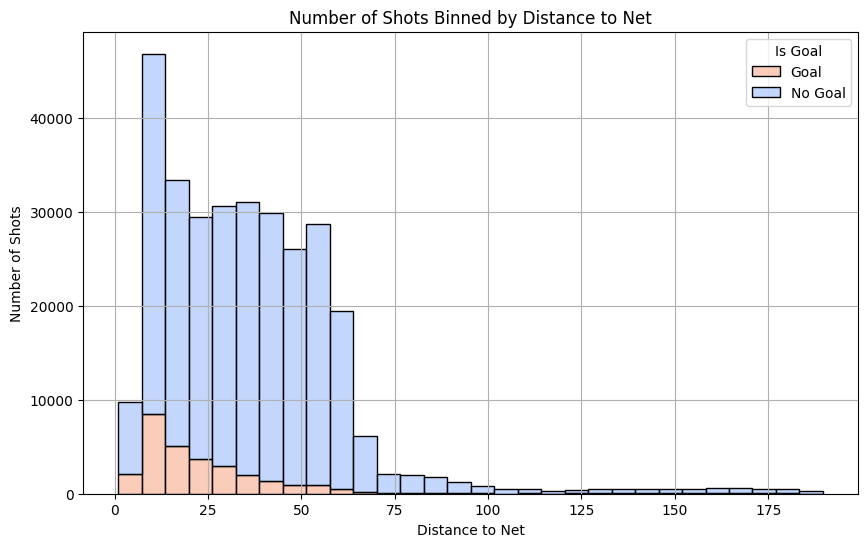

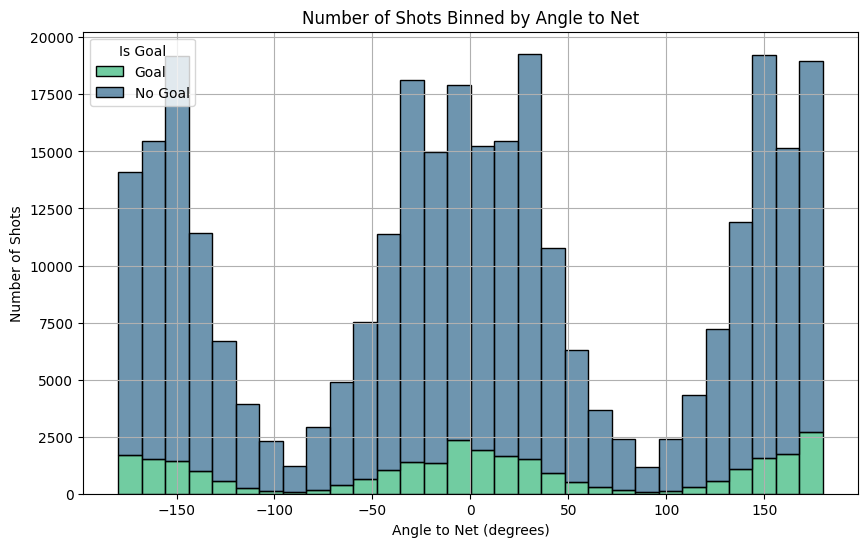

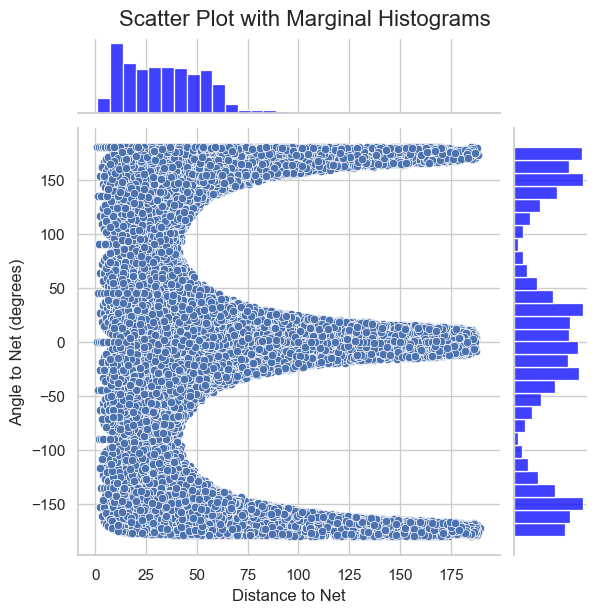

In [5]:
from ift6758.controller.nhl_shot_visualizer import NHLShotVisualizer
valid_data = train_val_df.dropna(subset=["distance_to_net", "angle_to_net"])
# Instantiate the visualizer with the processed data
visualizer = NHLShotVisualizer(valid_data )

# Generate the plots
visualizer.plot_distance_histogram()
visualizer.plot_angle_histogram()


visualizer.plot_2d_histogram_distance_angle()


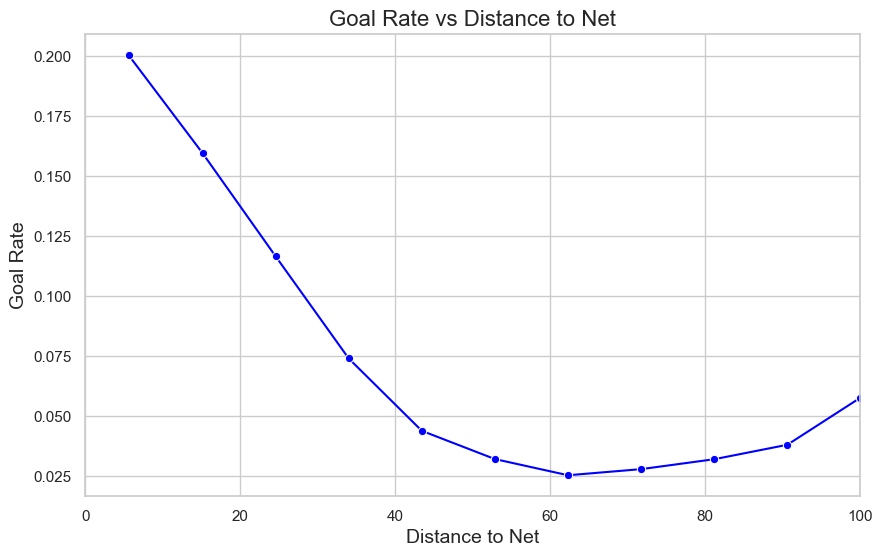

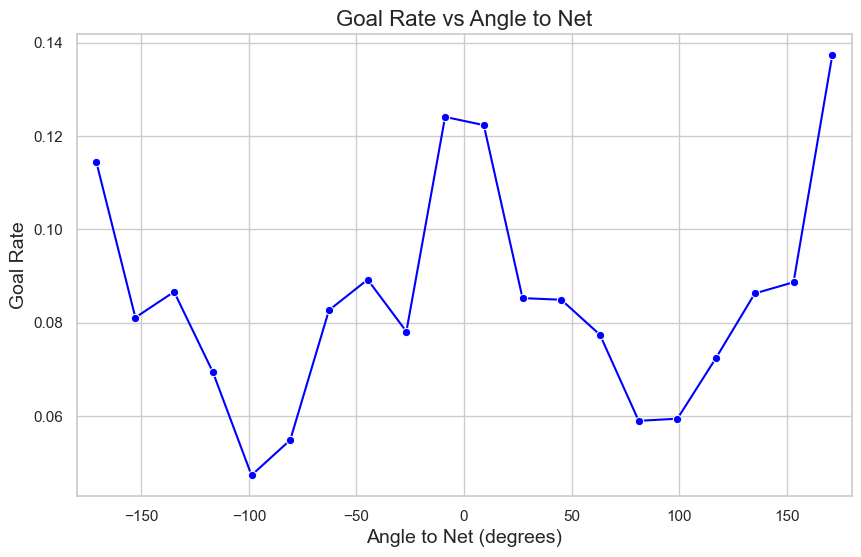

In [6]:
from ift6758.controller.nhl_shot_visualizer import NHLShotVisualizer
valid_data = train_val_df.dropna(subset=["distance_to_net", "angle_to_net"])
visualizer = NHLShotVisualizer(valid_data )
# Plot goal rate as a function of distance
visualizer.plot_goal_rate(
    column="distance_to_net",
    num_bins=20,
    xlabel="Distance to Net",
    title="Goal Rate vs Distance to Net"
)


# Plot goal rate as a function of angle
visualizer.plot_goal_rate(
    column="angle_to_net",
    num_bins=20,
    xlabel="Angle to Net (degrees)",
    title="Goal Rate vs Angle to Net"
)






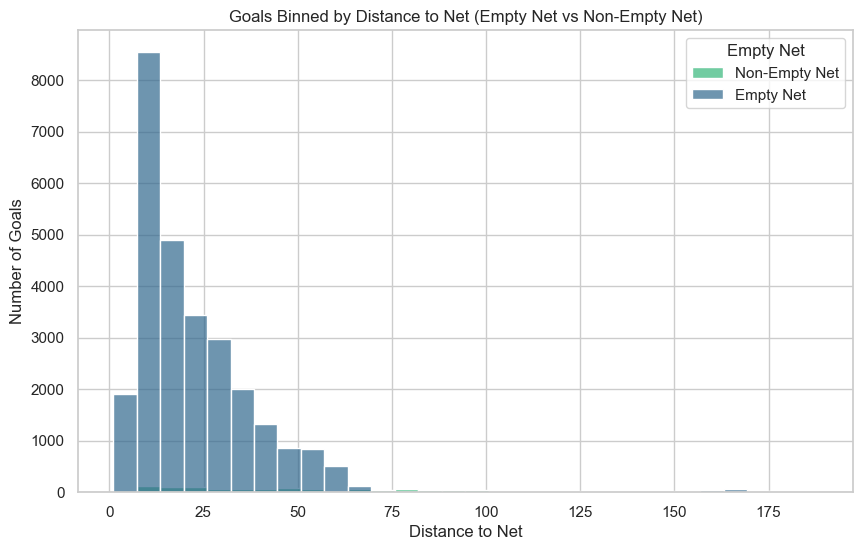

In [7]:
from ift6758.controller.nhl_shot_visualizer import NHLShotVisualizer

# Filter for goals only
goals_df = train_val_df[train_val_df['is_goal'] == 1]
visualizer = NHLShotVisualizer(goals_df)
visualizer.plot_goal_histogram()

In [8]:
# Define conditions for defensive zone goals using `home_team_defending_side`
defensive_goals = goals_df[
    (goals_df['is_goal'] == 1) & (
        ((goals_df['team_type'] == 'home') & 
         ((goals_df['home_team_defending_side'] == 'left') & (goals_df['x_coord'] < 0)) |
         ((goals_df['home_team_defending_side'] == 'right') & (goals_df['x_coord'] > 0))
        ) |
        ((goals_df['team_type'] == 'away') &
         ((goals_df['home_team_defending_side'] == 'left') & (goals_df['x_coord'] > 0)) |
         ((goals_df['home_team_defending_side'] == 'right') & (goals_df['x_coord'] < 0))
        )
    )
]

print(f"Defensive Zone Goals:\n{defensive_goals}")


Defensive Zone Goals:
           game_id   game_date  home_team_id  period time_in_period  event_id  \
49      2016020374  2016-12-04            16       3          13:06       664   
50      2016020374  2016-12-04            16       3          15:15       669   
60      2016020412  2016-12-10            26       1          03:10        11   
65      2016020412  2016-12-10            26       1          07:22        21   
92      2016020412  2016-12-10            26       3          12:39       533   
...            ...         ...           ...     ...            ...       ...   
305753  2019020517  2019-12-15            16       3          18:57       499   
305776  2019020259  2019-11-09            53       2          03:19       357   
305783  2019020259  2019-11-09            53       2          08:20       371   
305789  2019020259  2019-11-09            53       2          13:04       385   
305793  2019020259  2019-11-09            53       2          19:10       395   

     

In [18]:
import pandas as pd

# Define conditions for each shot type
def is_valid_shot(row):
    try:
        if row['shot_type'] == "wrap-around":
            return row['distance_to_net'] <= 10 and abs(row['x_coord']) <= 5
        elif row['shot_type'] in ["tip-in", "deflection"]:
            return row['distance_to_net'] <= 5
        return True  # Default valid for other types
    except KeyError as e:
        print(f"Missing column: {e}")
        return False
    except TypeError as e:
        print(f"TypeError: {e} for row {row}")
        return False

# Check for required columns and fill/drop NaN values
required_columns = ['shot_type', 'distance_to_net', 'x_coord']
if not all(col in defensive_goals.columns for col in required_columns):
    raise ValueError(f"One or more required columns are missing: {required_columns}")

# Fill or drop NaN values
defensive_goals = defensive_goals.dropna(subset=required_columns)

# Apply filtering
defensive_goals['valid_shot'] = defensive_goals.apply(is_valid_shot, axis=1)

# Filter incorrect shots
incorrect_shots = defensive_goals[~defensive_goals['valid_shot']].copy()
correct_shots = defensive_goals[defensive_goals['valid_shot']].copy()



In [17]:
incorrect_shots

,game_id,game_date,home_team_id,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_type,distance_to_net,angle_to_net,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,valid_shot
465,2016021081,2017-03-21,13,1,01:35,60,goal,True,tip-in,-74.0,...,home,15.033296,176.185925,False,Equal Strength,5v5,1551,8477493,8470320,False
477,2016021081,2017-03-21,13,1,11:51,90,goal,True,tip-in,-75.0,...,home,15.231546,156.801409,False,Equal Strength,5v5,1551,8475191,8470320,False
1013,2016020823,2017-02-11,3,3,05:36,529,goal,True,tip-in,-81.0,...,home,8.062258,172.874984,False,Equal Strength,5v5,1551,8470041,8475717,False
1067,2016020764,2017-02-02,53,2,14:24,392,goal,True,tip-in,-79.0,...,home,10.049876,-174.289407,False,Equal Strength,5v5,1551,8477989,8470645,False
1287,2016020758,2017-02-02,7,2,17:50,425,goal,True,tip-in,70.0,...,away,19.646883,-14.743563,False,Penalty Kill,4v5,1541,8475692,8475215,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305131,2019020715,2020-01-14,10,1,19:56,227,goal,True,tip-in,-72.0,...,home,17.029386,176.633539,False,Equal Strength,5v5,1551,8475786,8475839,False
305319,2019020098,2019-10-17,6,2,07:26,245,goal,True,tip-in,-74.0,...,home,15.297059,168.690068,False,Power Play,5v4,1451,8470638,8476883,False
305417,2019020926,2020-02-18,52,3,01:21,509,goal,True,wrap-around,84.0,...,away,8.602325,54.462322,False,Equal Strength,5v5,1551,8476924,8476945,False
305492,2019020932,2020-02-19,23,3,15:15,562,goal,True,wrap-around,81.0,...,away,9.433981,-32.005383,False,Equal Strength,5v5,1551,8476851,8474593,False


In [9]:
defensive_goals

,game_id,game_date,home_team_id,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,distance_to_net,angle_to_net,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
49,2016020374,2016-12-04,16,3,13:06,664,goal,True,wrist,-73.0,...,Blackhawks,home,17.464249,156.370622,False,Equal Strength,5v5,1551,8478550,8476945
50,2016020374,2016-12-04,16,3,15:15,669,goal,True,wrist,62.0,...,Jets,away,38.183766,-45.000000,False,Equal Strength,5v5,1551,8477429,8474152
60,2016020412,2016-12-10,26,1,03:10,11,goal,True,wrist,-74.0,...,Kings,home,15.033296,-176.185925,False,Power Play,5v4,1451,8470604,8477237
65,2016020412,2016-12-10,26,1,07:22,21,goal,True,slap,-31.0,...,Kings,home,62.769419,157.520566,False,Power Play,5v4,1451,8474166,8477237
92,2016020412,2016-12-10,26,3,12:39,533,goal,True,wrist,-60.0,...,Kings,home,34.132096,148.172553,False,Power Play,5v4,1451,8468483,8477237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305753,2019020517,2019-12-15,16,3,18:57,499,goal,True,wrist,-3.0,...,Blackhawks,home,94.021274,156.161260,True,Penalty Kill,5v6,651,8474141,Unknown
305776,2019020259,2019-11-09,53,2,03:19,357,goal,True,snap,63.0,...,Wild,away,32.202484,-36.158185,False,Penalty Kill,4v5,1541,8469459,8475311
305783,2019020259,2019-11-09,53,2,08:20,371,goal,True,wrist,-59.0,...,Coyotes,home,39.051248,-140.194429,False,Equal Strength,5v5,1551,8476994,8471227
305789,2019020259,2019-11-09,53,2,13:04,385,goal,True,wrist,83.0,...,Wild,away,8.485281,45.000000,False,Equal Strength,5v5,1551,8477942,8475311


In [10]:
# Count goals by shot type
print(goals_df['shot_type'].value_counts())


shot_type
wrist          14995
snap            4328
slap            3008
backhand        2869
tip-in          2708
deflected        887
wrap-around      221
Unknown           16
Name: count, dtype: int64
